In [25]:
#import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [24]:
#Data exploration

train = pd.read_csv("DataSets/train.csv")
test = pd.read_csv("DataSets/test.csv")

print(train.head())
print(train.info())
print(train.describe())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

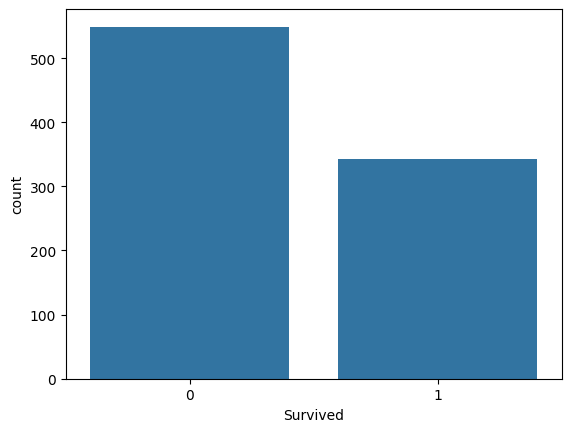

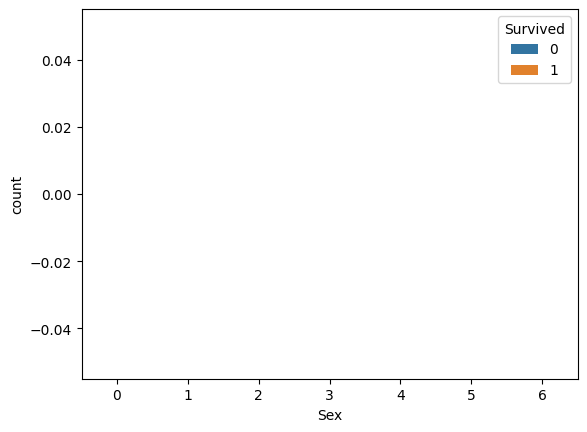

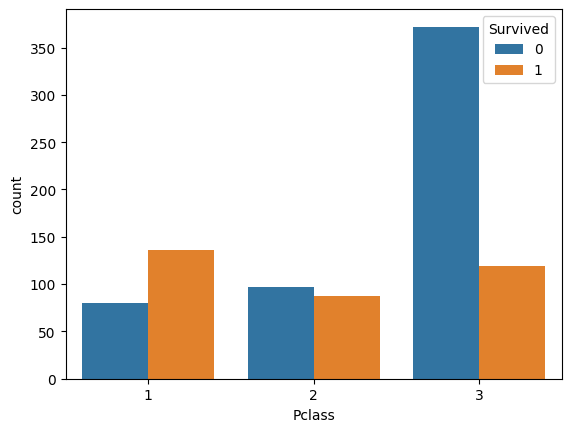

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex            891
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_Q       0
Embarked_S       0
FamilySize       0
IsAlone          0
dtype: int64

In [23]:
#survival distribution
sns.countplot(x="Survived", data=train)
plt.show()

# Gender vs Survival
sns.countplot(x="Sex", hue="Survived", data=train)
plt.show()

# Pclass vs Survival
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.show()

# Check missing values
train.isnull().sum()

In [22]:
# Now we will do Data preprocessing and Feature Engineering


train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(test["Age"].median())

if "Embarked" in train.columns:
    train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])
if "Embarked" in test.columns:
    test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode()[0])
test["Fare"] = test["Fare"].fillna(test["Fare"].median())


train["Sex"] = train["Sex"].map({"male":0, "female":1})
test["Sex"] = test["Sex"].map({"male":0, "female":1})

if "Embarked" in train.columns:
    train = pd.get_dummies(train, columns=["Embarked"], drop_first=True)
if "Embarked" in test.columns:
    test = pd.get_dummies(test, columns=["Embarked"], drop_first=True)

# Feature Engineering
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

train["IsAlone"] = 1
train.loc[train["FamilySize"] > 1, "IsAlone"] = 0

test["IsAlone"] = 1
test.loc[test["FamilySize"] > 1, "IsAlone"] = 0

for col in ["Embarked_Q", "Embarked_S"]:
    if col not in train.columns:
        train[col] = 0
    if col not in test.columns:
        test[col] = 0

features = ["Pclass","Sex","Age","Fare","FamilySize","IsAlone",
            "Embarked_Q","Embarked_S"]
X = train[features]
y = train["Survived"]

In [21]:
#TRAIN/VALIDATION SPLIT

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# MODEL BUILDING

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

In [28]:
# EVALUATION


print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

# Ensure all dummy columns exist in both train and test
for col in ["Embarked_Q", "Embarked_S"]:
    if col not in train.columns:
        train[col] = 0
    if col not in test.columns:
        test[col] = 0

# Ensure engineered features exist in test
if "FamilySize" not in test.columns:
    test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
if "IsAlone" not in test.columns:
    test["IsAlone"] = 1
    test.loc[test["FamilySize"] > 1, "IsAlone"] = 0
test_preds = model.predict(test_X)

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_preds
})

submission.to_csv("submission.csv", index=False)
print("✅ Submission file created!")

Accuracy: 0.7150837988826816
Confusion Matrix:
 [[84 21]
 [30 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77       105
           1       0.68      0.59      0.63        74

    accuracy                           0.72       179
   macro avg       0.71      0.70      0.70       179
weighted avg       0.71      0.72      0.71       179

✅ Submission file created!
